In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [122]:
normalization_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

new_data[normalization_columns] = scaler.fit_transform(new_data[normalization_columns])

new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [123]:
X = new_data.drop('Churn', axis = 'columns')
y = new_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
X_train.shape

(5625, 26)

In [125]:
X_test.shape

(1407, 26)

In [126]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-2ndokrg4
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-2ndokrg4
  Resolved https://github.com/tensorflow/docs to commit b12399eb2047f534a7474fff58c16b4e3be79886
  Preparing metadata (setup.py) ... done


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.metrics.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'), 'accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 100)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_pred = []

for prediction in predictions:
  if prediction > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_test[:10]

y_pred[:10]

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

In [ ]:
predictions = model.predict(X_test)

In [ ]:
import seaborn as sn
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 10))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
accuracy = ((956 + 148) / (956 + 226 + 77 + 148))
print(f"Model Accuracy: {accuracy}")

Training Larger ANN with Dropouot and Regularization

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display

import pathlib
import shutil
import tempfile

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
N_TRAIN = 5625
BATCH_SIZE = 32

STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
def compile_and_fit(model, name, optimizer=None, max_epochs=500):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.metrics.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    X_train,
    y_train,
    epochs=max_epochs,
    validation_data=(X_test, y_test),
    callbacks=get_callbacks(name),
    verbose=1)
  return history

In [ ]:
new_model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, input_shape = (26,), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, input_shape = (26,), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, input_shape = (26,), activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 26)                702       
                                                                 
 dropout_12 (Dropout)        (None, 26)                0         
                                                                 
 dense_19 (Dense)            (None, 15)                405       
                                                                 
 dropout_13 (Dropout)        (None, 15)                0         
                                                                 
 dense_20 (Dense)            (None, 15)                240       
                                                                 
 dropout_14 (Dropout)        (None, 15)                0         
                                                                 
 dense_21 (Dense)            (None, 10)               

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  1/176 [..............................] - ETA: 5:54 - loss: 0.8700 - binary_crossentropy: 0.7977 - accuracy: 0.4375

171/176 [============================>.] - ETA: 0s - loss: 0.7359 - binary_crossentropy: 0.6702 - accuracy: 0.6449

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch: 0, accuracy:0.6462,  binary_crossentropy:0.6700,  loss:0.7356,  val_accuracy:0.7342,  val_binary_crossentropy:0.5809,  val_loss:0.6418,  
176/176 [==============================] - 3s 6ms/step - loss: 0.7356 - binary_crossentropy: 0.6700 - accuracy: 0.6462 - val_loss: 0.6418 - val_binary_crossentropy: 0.5809 - val_accuracy: 0.7342
Epoch 2/500
176/176 [==============================] - 1s 5ms/step - loss: 0.6334 - binary_crossentropy: 0.5759 - accuracy: 0.7255 - val_loss: 0.5677 - val_binary_crossentropy: 0.5133 - val_accuracy: 0.7342
Epoch 3/500
176/176 [==============================] - 1s 4ms/step - loss: 0.5932 - binary_crossentropy: 0.5411 - accuracy: 0.7308 - val_loss: 0.5352 - val_binary_crossentropy: 0.4856 - val_accuracy: 0.7342
Epoch 4/500
176/176 [==============================] - 1s 5ms/step - loss: 0.5705 - binary_crossentropy: 0.5229 - accuracy: 0.7326 - val_loss: 0.5164 - val_binary_crossentropy: 0.4708 - val_accuracy: 0.7342
Epoch 5/500
176/176 [=================

(0.0, 1.0)

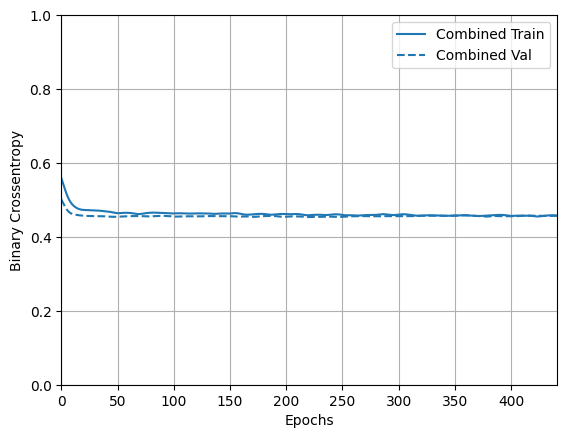

In [120]:
regularizer_histories = {}

regularizer_histories['combined'] = compile_and_fit(new_model, "regularizers/combined")

plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)

plotter.plot(regularizer_histories)
plt.ylim([0, 1])